------------
INSTRUCTIONS
-------------

Run each cell from top to bottom. The final cell allows you to save the generated data after all other cells were executed. Running the final cell is not mandatory, do it only if you wish to save the data. The data will be saved to the folder where this code is stored.

If this is your first time running the code, type ctrl + F and then type r'C, this will take you to the parts of the code where an instruction to read a specific path in your computer is given. Make sure that the path exists in your computer and that it corresponds to the path where the file being specified can be found.

The "FIRST EXTREMUM" and "SECOND EXTREMUM" cells allow you to obtain a static representation of a specific normal mode's extrema.

------------
DESCRIPTIONS
-------------

File type (PDB or CIF): The crystal structure file extension. Suggested value: PDB.

File name: The name of the file containing the crystal structure (do not include the extension).

Number of residues: This output tells you the number of residues of the biomolecule whose experimental B-factors you are trying to retrieve.



In [1]:
# LIBRARIES AND FUNCTIONS

# Libraries
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
import os

# String substraction
def substract(a, b):                              
    return "".join(a.rsplit(b))

File type (PDB or CIF): PDB
File name: 5L1X
Number of residues: 1326


<IPython.core.display.Javascript object>


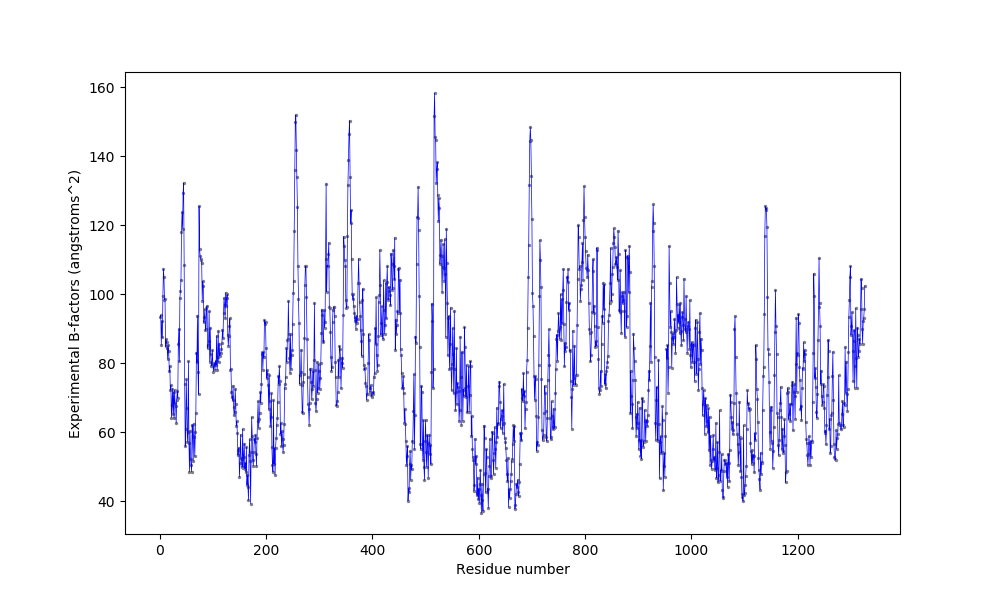

In [4]:
# EXPERIMENTAL B-FACTORS

# Enable dynamic graphs mode
%matplotlib nbagg

# File type
FileType = 0
while FileType == 0:
    FileType = input('\033[1m' + 'File type (PDB or CIF): ' + '\033[0')
    if FileType not in {'PDB', 'CIF'}:
        FileType = 0
        print('Invalid file type')
    elif FileType in {'PDB', 'CIF'}:
        FileType = str(FileType)
        
# File directory
FileName = 0
while FileName == 0:
    path = 0
    FileName = input('\033[1m' + 'File name: ' + '\033[0')
    if FileName.startswith('C') == True:
        FileName = 0
        print('This file does not contain B-factors')
    else:
        if FileType == 'PDB':
            FileName = FileName + '.pdb'
        elif FileType == 'CIF':
            FileName = FileName + '.cif'
        path  = os.path.join(r'C:\Users\santi\Desktop\2019\Biophysics\PDBs', FileName)
        if Path(path).is_file():
            if FileType == 'PDB':
                MoleculeName = substract(FileName,'.pdb')
            elif FileType == 'CIF':
                MoleculeName = substract(FileName,'.cif')
        else:
            FileName = 0
            print('File not found')
        
# Experimental B-factors
N = 0
BFactorsList = []
with open(path) as file:
    for line in file:
        if line[:4] == 'ATOM':
            if FileType == 'PDB':
                if line[13:15] == 'CA':
                    N += 1
                    BFactorsList.append(line[60:66])
            elif FileType == 'CIF':
                if line[15:17] == 'CA':
                    N += 1
                    BFactorsList.append(line[60:66])
file.closed
print('Number of residues: ' + str(N))
BFactors = np.zeros((N))
for i in range(0,N):
    BFactors[i] = float(BFactorsList[i])

# Dataframe
df = pd.DataFrame({'Experimental B-factors': BFactors})
df.index = np.arange(1, len(df) + 1)
    
# Graph
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6
fig, ax = plt.subplots()
ax.set(xlabel = 'Residue number', ylabel = 'Experimental B-factors (angstroms^2)')
i = np.arange(1, N + 1, 1)
ax.scatter(i, BFactors, c = 'gray', s = 2)
ax.plot(i, BFactors, c = 'blue', linewidth = 0.5, linestyle = '-')
Min = np.amin(BFactors)
Max = np.amax(BFactors)
Range = Max - Min
ax.set_ylim(Min - 0.05*Range, Max + 0.05*Range)
plt.show()

In [ ]:
# SAVE EXPERIMENTAL B-FACTORS

df.to_csv(MoleculeName + '_experimentalB-factors.csv')